**Importing the Dependencies**

In [166]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from PIL import Image as img
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(0)   # Creating Reproduceable Seed
from tensorflow.keras import datasets   # Importing the Datasets
from tensorflow.keras.utils import to_categorical   # For one-hot encoding

**Image Data Preparation**

In [9]:
# Loading the datasets
# MNIST Handwritten Digits
# CIFAR-10

(x_train_digits, y_train_digits), (x_test_digits, y_test_digits) = datasets.mnist.load_data()
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [46]:
# Shape of the datasets
print(x_train_digits.shape, y_train_digits.shape, x_test_digits.shape, y_test_digits.shape)
print(x_train_cifar.shape, y_train_cifar.shape, x_test_cifar.shape, y_test_cifar.shape)
print(x_train_digits[0].shape, x_test_digits[0].shape)
print(x_train_cifar[0].shape, x_test_cifar[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(28, 28) (28, 28)
(32, 32, 3) (32, 32, 3)


**70,000 Grayscale Images --> MNIST Handwritten Dataset**

**60,000 RGB Images --> CIFAR-10**

In [52]:
# Defining the Classes
handwritten_digits = {
                        0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9'
}

cifar = {
          0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'
}

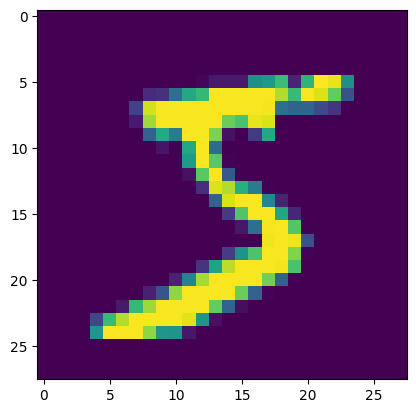

Label: 5


In [47]:
# Visualizing some samples of the datasets
plt.imshow(x_train_digits[0])
plt.show()
cv2_imshow(x_train_digits[0])
print('Label:', y_train_digits[0])

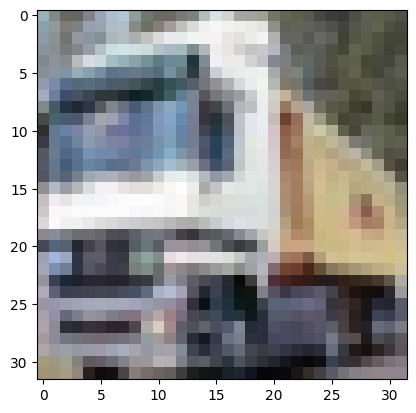

[9]
Label: truck


In [48]:
plt.imshow(x_train_cifar[1])
plt.show()
print(y_train_cifar[1])
print('Label:', cifar[9])

In [53]:
# Normalizing the dataset from 0 to 1
#Digits
x_train_digits = x_train_digits.astype('float32') / 255.0
x_test_digits = x_test_digits.astype('float32') / 255.0

#Cifar
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

In [54]:
print(x_train_digits[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [55]:
print(x_train_cifar[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [56]:
# One-Hot Label Encoding
#Digits
y_train_digits = to_categorical(y_train_digits, num_classes=10)
y_test_digits = to_categorical(y_test_digits, num_classes=10)

#Cifar
y_train_cifar = to_categorical(y_train_cifar, num_classes=10)
y_test_cifar = to_categorical(y_test_cifar, num_classes=10)

In [57]:
print(y_train_digits[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [58]:
print(y_train_cifar[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [62]:
# Checking all Image Dataset Labels
print(np.unique(y_train_digits))
print(np.unique(y_train_cifar))

[0. 1.]
[0. 1.]


In [69]:
# Checking again the image dataset shape
print(x_train_digits.shape, x_test_digits.shape)
print(x_train_cifar.shape, x_test_cifar.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(50000, 32, 32, 3) (10000, 32, 32, 3)


# **ReLu Activation Function**

**Building the Model/Shallow Neural Network - ReLu**

In [81]:
# Defining the no. of layers, neurons and activation function of each layer
model = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(32, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(10, activation='softmax')
])

In [83]:
# Compiling the Model - Optimizer, Loss and Evaluation Metric
model.compile(
                optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
)

## **Training the Model using MNIST Handwritten Digits Dataset**

In [84]:
# Training the Model - Digits
history = model.fit(x_train_digits, y_train_digits, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 5s 2ms/step - loss: 0.4475 - accuracy: 0.8624 - val_loss: 0.1655 - val_accuracy: 0.9522
Epoch 2/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2446 - accuracy: 0.9263 - val_loss: 0.1265 - val_accuracy: 0.9667
Epoch 3/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2019 - accuracy: 0.9378 - val_loss: 0.1072 - val_accuracy: 0.9710
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1794 - accuracy: 0.9444 - val_loss: 0.1055 - val_accuracy: 0.9702
Epoch 5/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1637 - accuracy: 0.9499 - val_loss: 0.1079 - val_accuracy: 0.9672
Epoch 6/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1527 - accuracy: 0.9535 - val_loss: 0.0986 - val_accuracy: 0.9735
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1441 - accuracy: 0.9553 - val_loss: 0.1023 - val_accuracy:

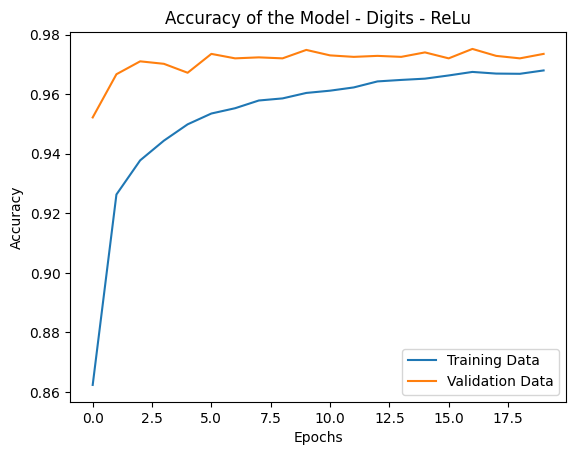

In [94]:
# Visualizing the Accuracies of the Model
relu_accuracy = plt.figure()
plt.plot(history.history['accuracy'], label='Training Data')
plt.plot(history.history['val_accuracy'], label='Validation Data')
plt.title('Accuracy of the Model - Digits - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
relu_accuracy.savefig('/content/ReLu Files/ReLu Accuracy Plot - Digits.png')

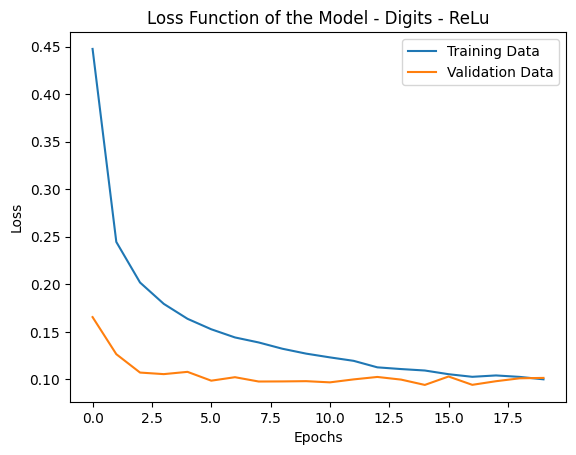

In [95]:
# Visualizing the Loss of the Model
relu_loss = plt.figure()
plt.plot(history.history['loss'], label='Training Data')
plt.plot(history.history['val_loss'], label='Validation Data')
plt.title('Loss Function of the Model - Digits - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
relu_loss.savefig('/content/ReLu Files/ReLu Loss Function Plot - Digits.png')

In [105]:
# Evaluating the Model using Test Dataset
loss, accuracy = model.evaluate(x_test_digits, y_test_digits, verbose=2)

313/313 - 0s - loss: 0.1098 - accuracy: 0.9700 - 415ms/epoch - 1ms/step


In [106]:
print(loss)
print(accuracy)

0.10984163731336594
0.9700000286102295


In [107]:
test_predict = model.predict(x_test_digits)

313/313 [==============================] - 1s 3ms/step


In [117]:
# Turning the encoded labels to labels 0-9
test_predict_labels = [np.argmax(i) for i in test_predict]
test_labels = [np.argmax(i) for i in y_test_digits]

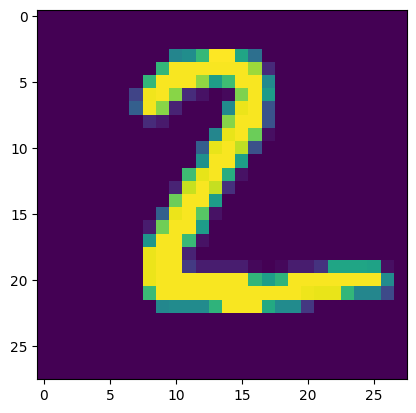

Test Label: 2
Test Predict Label: 2


In [136]:
# Checking the created labels and prediction of the model
plt.imshow(x_test_digits[1])
plt.show()
print('Test Label:', test_labels[1])
print('Test Predict Label:', test_predict_labels[1])

In [151]:
print(np.unique(test_labels))
print(np.unique(test_predict_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Evaluating the Model using Evaluation Metrics**

In [145]:
# Confusion Matrix
cf_matrix = confusion_matrix(test_labels, test_predict_labels)

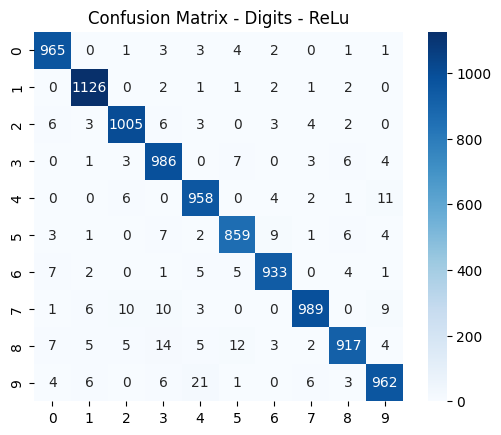

In [138]:
# Visualizing the confusion matrix
relu_cfmatrix = plt.figure()
sns.heatmap(cf_matrix, cbar=True, square=True, fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix - Digits - ReLu')
plt.show()
relu_cfmatrix.savefig('/content/ReLu Files/ReLu Confusion Matrix - Digits')

In [156]:
# Precision - False Positive
precision_score(test_labels, test_predict_labels, average='macro') # Each class --> Average

0.9699031780475872

In [157]:
precision_score(test_labels, test_predict_labels, average='micro') # As a whole

0.97

In [161]:
# Precision - False Negative
recall_score(test_labels, test_predict_labels, average='macro')

0.9696267650757399

In [162]:
recall_score(test_labels, test_predict_labels, average='micro')

0.97

In [163]:
# F1 Score - Harmonic Mean
f1_score(test_labels, test_predict_labels, average='macro')

0.9696926034728579

In [164]:
f1_score(test_labels, test_predict_labels, average='micro')

0.97

**SUMMARY: Digits Dataset**

**(20th Epoch)**

Accuracy: 0.9679

Validation Accuracy: 0.9735

Loss: 0.1001

Validation Loss: 0.1016

**(Test Dataset Evaluation)**

Test Accuracy: 0.9700

**(Macro - Micro Evaluation)**

Precision: 0.9699 - 0.97

Recall: 0.9696 - 0.97

F1 Score: 0.9696 - 0.97

## **Training the Model using CIFAR-10 Dataset**

In [ ]:
# Training the Model - Cifar
history = model.fit(x_train_digits, y_train_digits, validation_split=0.1, epochs=20)